In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ridership = pd.read_csv("Datasets/ridership.csv")

In [4]:
ridership.head()

,day,hour,enter_abbr,exit_abbr,trip_count,datetime,day_of_week
0,2011-01-01,0,12TH,16TH,1,2011-01-01 00:00:00,5
1,2011-01-01,0,12TH,24TH,3,2011-01-01 00:00:00,5
2,2011-01-01,0,12TH,ASHB,2,2011-01-01 00:00:00,5
3,2011-01-01,0,12TH,BAYF,5,2011-01-01 00:00:00,5
4,2011-01-01,0,12TH,CIVC,3,2011-01-01 00:00:00,5


In [4]:
companies = pd.read_csv("Datasets/companies.csv")
demographics = pd.read_csv("Datasets/demographics.csv")
fares = pd.read_csv("Datasets/fares.csv")
real_estate = pd.read_csv("Datasets/real_estate.csv")
stations = pd.read_csv("Datasets/stations.csv")
weather = pd.read_csv("Datasets/weather.csv")

In [6]:
stations.head()

,name,abbr,latitude,longitude,address,city,county,state,zipcode
0,12th St. Oakland City Center,12TH,37.803664,-122.271604,1245 Broadway,Oakland,alameda,CA,94612
1,16th St. Mission,16TH,37.765062,-122.419694,2000 Mission Street,San Francisco,sanfrancisco,CA,94110
2,19th St. Oakland,19TH,37.807870,-122.269029,1900 Broadway,Oakland,alameda,CA,94612
3,24th St. Mission,24TH,37.752254,-122.418466,2800 Mission Street,San Francisco,sanfrancisco,CA,94110
4,Ashby,ASHB,37.853024,-122.269780,3100 Adeline Street,Berkeley,alameda,CA,94703


In [7]:
stations_abbr = stations["abbr"]

In [10]:
sample = ridership[(ridership["enter_abbr"] == "12TH") & (ridership["exit_abbr"] == "16TH")]
sample

,day,hour,enter_abbr,exit_abbr,trip_count,datetime,day_of_week
0,2011-01-01,0,12TH,16TH,1,2011-01-01 00:00:00,5
710,2011-01-01,1,12TH,16TH,6,2011-01-01 01:00:00,5
1485,2011-01-01,2,12TH,16TH,5,2011-01-01 02:00:00,5
2230,2011-01-01,3,12TH,16TH,1,2011-01-01 03:00:00,5
2750,2011-01-01,4,12TH,16TH,1,2011-01-01 04:00:00,5
...,...,...,...,...,...,...,...
48756846,2015-12-31,19,12TH,16TH,11,2015-12-31 19:00:00,3
48758348,2015-12-31,20,12TH,16TH,16,2015-12-31 20:00:00,3
48759721,2015-12-31,21,12TH,16TH,31,2015-12-31 21:00:00,3
48760990,2015-12-31,22,12TH,16TH,9,2015-12-31 22:00:00,3


In [16]:
sample[sample["hour"] == 8]["trip_count"].mean()

17.260204081632654

# BART Usage by location

In [150]:
stnabbr = stations["abbr"].unique()
stnabbr

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLS', 'COLM', 'CONC', 'DALY', 'DBRK', 'DUBL', 'DELN',
       'PLZA', 'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE',
       'MCAR', 'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PITT',
       'PHIL', 'POWL', 'RICH', 'ROCK', 'SBRN', 'SFIA', 'SANL', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK'], dtype=object)

In [66]:
enter_by_station = { abbr : 0 for abbr in stnabbr }
exit_by_station = { abbr : 0 for abbr in stnabbr }
idx = 0

for row in ridership.itertuples():
    enter_abbr = row.enter_abbr
    exit_abbr = row.exit_abbr
    enter_by_station[enter_abbr] += row.trip_count
    exit_by_station[exit_abbr] += row.trip_count
    
    if idx % 10000000 == 0:
        print(f"Progress: {idx / ridership.shape[0]}")
    idx += 1

Progress: 0.0
{'12TH': 1, '16TH': 0, '19TH': 0, '24TH': 0, 'ASHB': 0, 'BALB': 0, 'BAYF': 0, 'CAST': 0, 'CIVC': 0, 'COLS': 0, 'COLM': 0, 'CONC': 0, 'DALY': 0, 'DBRK': 0, 'DUBL': 0, 'DELN': 0, 'PLZA': 0, 'EMBR': 0, 'FRMT': 0, 'FTVL': 0, 'GLEN': 0, 'HAYW': 0, 'LAFY': 0, 'LAKE': 0, 'MCAR': 0, 'MLBR': 0, 'MONT': 0, 'NBRK': 0, 'NCON': 0, 'OAKL': 0, 'ORIN': 0, 'PITT': 0, 'PHIL': 0, 'POWL': 0, 'RICH': 0, 'ROCK': 0, 'SBRN': 0, 'SFIA': 0, 'SANL': 0, 'SHAY': 0, 'SSAN': 0, 'UCTY': 0, 'WCRK': 0, 'WDUB': 0, 'WOAK': 0}
Progress: 0.2050727029898821
{'12TH': 3717047, '16TH': 3578148, '19TH': 3143581, '24TH': 4096810, 'ASHB': 1503905, 'BALB': 3953129, 'BAYF': 1713985, 'CAST': 792541, 'CIVC': 6424981, 'COLS': 2302431, 'COLM': 1182689, 'CONC': 1663214, 'DALY': 2612772, 'DBRK': 3737712, 'DUBL': 2251808, 'DELN': 2236614, 'PLZA': 1355408, 'EMBR': 9708447, 'FRMT': 2312812, 'FTVL': 2371926, 'GLEN': 2336770, 'HAYW': 1449441, 'LAFY': 1035305, 'LAKE': 1802996, 'MCAR': 2602833, 'MLBR': 1723576, 'MONT': 9471964, 'N

In [80]:
top_enter_stns = sorted(list(enter_by_station.keys()), key=lambda x: -enter_by_station[x])
top_exit_stns = sorted(list(exit_by_station.keys()), key=lambda x: -exit_by_station[x])

In [81]:
for i in range(5):
    enter, exit = top_enter_stns[i], top_exit_stns[i]
    print(f"top {i + 1}")
    print(enter, enter_by_station[enter])
    print(exit, exit_by_station[exit])
    
    

top 1
POWL 53203561
EMBR 58985685
top 2
EMBR 51801102
MONT 55351060
top 3
MONT 51504381
POWL 46990409
top 4
CIVC 34120098
CIVC 31153208
top 5
24TH 20349052
DBRK 20282335


In [82]:
enter_by_station["OAKL"]

598302

In [151]:
trip = { (stn1, stn2) : 0 for stn1 in stnabbr for stn2 in stnabbr }
idx = 0

for row in ridership.itertuples():
    enter_abbr = row.enter_abbr
    exit_abbr = row.exit_abbr
    trip[(enter_abbr, exit_abbr)] += row.trip_count
    
print("Done")

Done


In [79]:
top_trips = sorted(list(trip.keys()), key=lambda x: -trip[x])

for i in range(20):
    x = top_trips[i]
    print(f"Trip: {x}, Count: {trip[x]}")

Trip: ('POWL', 'BALB'), Count: 5010619
Trip: ('BALB', 'POWL'), Count: 4077654
Trip: ('BALB', 'MONT'), Count: 3887372
Trip: ('POWL', '24TH'), Count: 3767921
Trip: ('24TH', 'POWL'), Count: 3270211
Trip: ('24TH', 'MONT'), Count: 3172510
Trip: ('POWL', '16TH'), Count: 2984632
Trip: ('DUBL', 'EMBR'), Count: 2808200
Trip: ('16TH', 'POWL'), Count: 2621746
Trip: ('MONT', '24TH'), Count: 2569777
Trip: ('SFIA', 'POWL'), Count: 2561282
Trip: ('POWL', 'DALY'), Count: 2548048
Trip: ('FRMT', 'EMBR'), Count: 2482213
Trip: ('PHIL', 'EMBR'), Count: 2454664
Trip: ('EMBR', 'DUBL'), Count: 2407780
Trip: ('24TH', 'EMBR'), Count: 2403363
Trip: ('WOAK', 'EMBR'), Count: 2379377
Trip: ('GLEN', 'MONT'), Count: 2366231
Trip: ('POWL', 'GLEN'), Count: 2366225
Trip: ('DALY', 'MONT'), Count: 2362182


# Usage of BART by month


In [272]:
dates = ridership["day"].unique()

monthly_usage = {}

for date in dates:
    year, month, day = date.split("-")
    monthly_usage[(year, month)] = 0

for row in ridership.itertuples():
    year, month, day = row.day.split("-")
    monthly_usage[(year, month)] += row.trip_count


['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12']


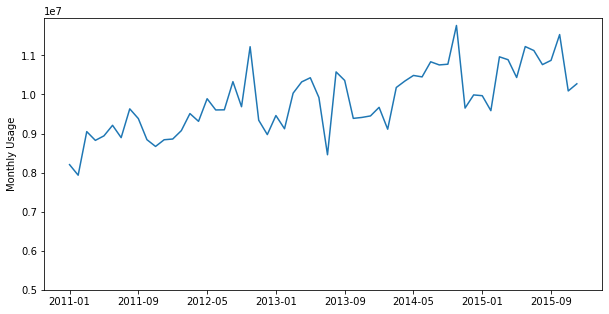

In [297]:
xlab = set()
for date in ridership["day"].unique():
    year, month, day = date.split("-")
    xlab.add(f"{year}-{month}")
xlab = list(xlab)
xlab.sort()
print(xlab)

plt.figure(figsize=(10, 5))
ax = plt.gca()
monthly_usage_list = [monthly_usage[x] for x in monthly_usage]
plt.plot(xlab, monthly_usage_list)
plt.ylabel("Monthly Usage")
plt.ylim(bottom = 0.5e7)
ax.set_xticks(ax.get_xticks()[::8])

# Fare analysis

We will analyze the fare by demographics

In [245]:
demographics

,year,zipcode,totalpop,some_hs,hs_grad,some_college,bach_degree,grad_degree,pov_below_100,pov_100_150,pov_150_plus,yes_public_assistance,no_public_assistance,gini,median_household_income,per_capita_income
0,2011,94014,47087,5886,7614,9210,7516,1724,3979,3653,39296,452,13238,0.3822,75754.0,25707.0
1,2011,94030,21275,1438,3162,4816,4055,1992,1212,1033,18703,113,7995,0.4289,101710.0,41515.0
2,2011,94066,40974,2738,6730,9374,7589,2321,2645,2111,35704,185,14620,0.3791,83478.0,34007.0
3,2011,94080,63275,6936,9931,13378,10280,3361,3547,5012,54278,213,21027,0.3939,84106.0,31645.0
4,2011,94102,24754,4199,4430,4871,4623,2551,6221,4453,13496,963,13921,0.5845,38715.0,28747.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2014,94621,32269,7508,4962,4282,887,267,11467,5486,15056,1376,7752,0.4447,31000.0,12351.0
144,2014,94702,16868,940,1349,2847,3774,3426,2861,1007,12926,202,7337,0.4672,98281.0,36522.0
145,2014,94703,21421,921,1730,2941,4869,4578,3943,1633,15807,454,8506,0.4970,95966.0,36909.0
146,2014,94704,26334,232,780,1693,2889,2574,8590,1768,9171,126,7916,0.6005,55293.0,21062.0


In [252]:
demographic_dict = {}

factors = ['some_hs', 'hs_grad', 'some_college',
       'bach_degree', 'grad_degree', 'pov_below_100', 'pov_100_150',
       'pov_150_plus', 'yes_public_assistance', 'no_public_assistance']

other_factors = ["gini", "median_household_income"]

for idx in range(demographics.shape[0]):
    demographic_dict[demographics.loc[idx, "zipcode"]] = { f:  demographics.loc[idx, f] / demographics.loc[idx, "totalpop"] for f in factors }
    for f in other_factors:
        demographic_dict[demographics.loc[idx, "zipcode"]][f] = demographics.loc[idx, f]
    demographic_dict[demographics.loc[idx, "zipcode"]]["est.discount_prop"] = (demographics.loc[idx, "pov_below_100"] + \
                                                        demographics.loc[idx, "yes_public_assistance"]) / demographics.loc[idx, "totalpop"]

for x in demographic_dict:
    print(x, demographic_dict[x])
    break
# for row in demographics.itertuples():
#     demographic_dict[row.zipcode] = [
#         row.gini, row.median_household_income, (row.pov_below_100 + row.yes_public_assistance) / row.totalpop
#     ]

94014 {'some_hs': 0.12318691280698862, 'hs_grad': 0.17436541948244602, 'some_college': 0.1993365749134663, 'bach_degree': 0.16183863523982198, 'grad_degree': 0.03372754244272293, 'pov_below_100': 0.10515905719465964, 'pov_100_150': 0.09168452282841602, 'pov_150_plus': 0.8015081588923686, 'yes_public_assistance': 0.00583072358661612, 'no_public_assistance': 0.2733434976100214, 'gini': 0.4095, 'median_household_income': 76182.0, 'est.discount_prop': 0.11098978078127575}


In [78]:
zipcode = {}
for row in stations.itertuples():
    zipcode[row.abbr] = row.zipcode

In [85]:
abbr_usage = {}
def time_cat(t):
    if 6 <= t <= 11:
        return "morning"
    elif 12 <= t <= 5 + 12:
        return "afternoon"
    elif 6 + 12 <= t <= 11 + 12:
        return "evening"
    else:
        return "night"

for row in ridership.itertuples():
    year = row.day.split("-")[0]
    x = (year, time_cat(row.hour), row.enter_abbr, row.exit_abbr)
    if x not in abbr_usage:
        abbr_usage[x] = 0
    abbr_usage[x] += row.trip_count

In [76]:
real_estate_dict = {}

for row in real_estate.iterrows():
    zipcode = row[1][1]
    idx = 184
    for year in range(2011, 2016):
        for month in range(1, 13):
            if month < 10:
                month = "0" + str(month)
            if (zipcode, year) not in real_estate_dict:
                real_estate_dict[(zipcode, year)] = {"zillow": 0}
            real_estate_dict[(zipcode, year)]["zillow"] += row[1][idx] / 12
            idx += 1
        real_estate_dict[(zipcode, year)]["sizerank"] = row[1][6]


In [8]:
fare_dict = {}

for row in fares.itertuples():
    fare_dict[(row.station1, row.station2)] = (row.fare, row.discount_fare)
    fare_dict[(row.station2, row.station1)] = (row.fare, row.discount_fare)
    fare_dict[(row.station1, row.station1)] = (0, 0)
    fare_dict[(row.station2, row.station2)] = (0, 0)

In [ ]:
distance = {}

for x in zipcode:
    for y in zipcode:
        z1, z2 = zipcode[x], zipcode[y]
        x1 = stations[stations["zipcode"] == z1]["latitude"].mean()
        y1 = stations[stations["zipcode"] == z1]["longitude"].mean()
        x2 = stations[stations["zipcode"] == z2]["latitude"].mean()
        y2 = stations[stations["zipcode"] == z2]["longitude"].mean()
        distance[(z1, z2)] = ((x1 - x2)**2 + (y1 - y2)**2) **(1/2)

distance

In [253]:
df = {
    "fare" : [],
    "discount_fare": [],
    "usage": [],
    "year": [],
    "time": [],
    "distance": [],
    "enter_abbr": [],
    "enter_gini": [],
    "enter_est.discount_prop": [],
    "enter_zillow": [],
    "enter_size": [],
    "exit_abbr": [],
    "exit_gini": [],
    "exit_est.discount_prop": [],
    "exit_zillow": [],
    "exit_size": []
}

dem_factors = factors + other_factors + ["est.discount_prop"]

for f in dem_factors:
    df[f"enter_{f}"] = []
    df[f"exit_{f}"] = []


for x in abbr_usage:
    year, time, enter_abbr, exit_abbr = x
    year = int(year)
    fare, discount_fare = fare_dict[(enter_abbr, exit_abbr)]
    df["fare"].append(fare)
    df["discount_fare"].append(discount_fare)
    df["usage"].append(abbr_usage[x])
    df["year"].append(year)
    df["time"].append(time)
    df["enter_abbr"].append(enter_abbr)
    df["exit_abbr"].append(exit_abbr)
    
    enter_zip, exit_zip = zipcode[enter_abbr], zipcode[exit_abbr]
    df["distance"].append(distance[(enter_zip, exit_zip)]) 
    dem_dict = demographic_dict[enter_zip] if enter_zip in demographic_dict else None
    
    for f in dem_factors:
        x = dem_dict[f] if dem_dict and f in dem_dict else None
        df["enter_" + f].append(x)
                                
    dem_dict = demographic_dict[exit_zip] if exit_zip in demographic_dict else None
    
    for f in dem_factors:
        x = dem_dict[f] if dem_dict and f in dem_dict else None
        df["exit_" + f].append(x)
    
    enter_dict = real_estate_dict[(enter_zip, year)] if (enter_zip, year) in real_estate_dict else None
    enter_zillow = enter_dict["zillow"] if enter_dict is not None else None
    enter_sizeRank = enter_dict["sizerank"] if enter_dict is not None else None
    df["enter_zillow"].append(enter_zillow)
    df["enter_size"].append(enter_sizeRank)
    
    
    exit_dict = real_estate_dict[(exit_zip, year)] if (exit_zip, year) in real_estate_dict else None
    exit_zillow = exit_dict["zillow"] if exit_dict is not None else None
    exit_sizeRank = exit_dict["sizerank"] if exit_dict is not None else None
        
    df["exit_zillow"].append(exit_zillow)
    df["exit_size"].append(exit_sizeRank)

In [254]:
df = pd.DataFrame(df)
df

,fare,discount_fare,usage,year,time,distance,enter_abbr,enter_gini,enter_est.discount_prop,enter_zillow,...,enter_pov_100_150,exit_pov_100_150,enter_pov_150_plus,exit_pov_150_plus,enter_yes_public_assistance,exit_yes_public_assistance,enter_no_public_assistance,exit_no_public_assistance,enter_median_household_income,exit_median_household_income
0,3.60,1.35,1583,2011,night,0.156044,12TH,0.5316,0.333586,2.825167e+05,...,0.139310,0.072779,0.534966,0.785752,0.021103,0.013903,0.530414,0.370152,35958.0,87928.0
1,3.70,1.35,1748,2011,night,0.156044,12TH,0.5316,0.333586,2.825167e+05,...,0.139310,0.072779,0.534966,0.785752,0.021103,0.013903,0.530414,0.370152,35958.0,87928.0
2,1.95,0.70,1215,2011,night,0.047260,12TH,0.5316,0.333586,2.825167e+05,...,0.139310,0.076234,0.534966,0.737921,0.021103,0.021194,0.530414,0.397087,35958.0,95966.0
3,2.85,1.05,980,2011,night,0.179907,12TH,0.5316,0.333586,2.825167e+05,...,0.139310,0.108338,0.534966,0.708639,0.021103,0.011546,0.530414,0.348987,35958.0,55193.0
4,3.45,1.25,2597,2011,night,0.141950,12TH,0.5316,0.333586,2.825167e+05,...,0.139310,0.171063,0.534966,0.529254,0.021103,0.032199,0.530414,0.542855,35958.0,34014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39427,5.00,1.85,8,2015,night,0.333976,DUBL,0.3874,0.043184,8.400917e+05,...,0.027891,0.017884,0.932404,0.967075,0.004575,0.001203,0.333187,0.360042,138966.0,211563.0
39428,6.35,2.35,3,2015,night,0.305165,NCON,0.4129,0.220014,3.670167e+05,...,0.141987,0.031790,0.649330,0.850406,0.016287,0.005884,0.314792,0.327380,49500.0,126916.0
39429,4.20,1.55,2,2015,night,0.274333,SHAY,0.4174,0.160258,4.610250e+05,...,0.102002,0.017884,0.743347,0.967075,0.013946,0.001203,0.276965,0.360042,65129.0,211563.0
39430,4.85,1.80,1,2015,night,0.311893,WDUB,0.3698,0.041292,7.285750e+05,...,0.031790,0.017884,0.850406,0.967075,0.005884,0.001203,0.327380,0.360042,126916.0,211563.0


In [255]:
cat_feat = ["time", "enter_abbr", "exit_abbr"]

df_new = pd.get_dummies(df.drop(["enter_abbr", "exit_abbr"], axis=1))
df_new

,fare,discount_fare,usage,year,distance,enter_gini,enter_est.discount_prop,enter_zillow,enter_size,exit_gini,...,enter_yes_public_assistance,exit_yes_public_assistance,enter_no_public_assistance,exit_no_public_assistance,enter_median_household_income,exit_median_household_income,time_afternoon,time_evening,time_morning,time_night
0,3.60,1.35,1583,2011,0.156044,0.5316,0.333586,2.825167e+05,4241.0,0.4947,...,0.021103,0.013903,0.530414,0.370152,35958.0,87928.0,0,0,0,1
1,3.70,1.35,1748,2011,0.156044,0.5316,0.333586,2.825167e+05,4241.0,0.4947,...,0.021103,0.013903,0.530414,0.370152,35958.0,87928.0,0,0,0,1
2,1.95,0.70,1215,2011,0.047260,0.5316,0.333586,2.825167e+05,4241.0,0.4970,...,0.021103,0.021194,0.530414,0.397087,35958.0,95966.0,0,0,0,1
3,2.85,1.05,980,2011,0.179907,0.5316,0.333586,2.825167e+05,4241.0,0.4166,...,0.021103,0.011546,0.530414,0.348987,35958.0,55193.0,0,0,0,1
4,3.45,1.25,2597,2011,0.141950,0.5316,0.333586,2.825167e+05,4241.0,0.6041,...,0.021103,0.032199,0.530414,0.542855,35958.0,34014.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39427,5.00,1.85,8,2015,0.333976,0.3874,0.043184,8.400917e+05,2743.0,0.4629,...,0.004575,0.001203,0.333187,0.360042,138966.0,211563.0,0,0,0,1
39428,6.35,2.35,3,2015,0.305165,0.4129,0.220014,3.670167e+05,2323.0,0.3698,...,0.016287,0.005884,0.314792,0.327380,49500.0,126916.0,0,0,0,1
39429,4.20,1.55,2,2015,0.274333,0.4174,0.160258,4.610250e+05,257.0,0.4629,...,0.013946,0.001203,0.276965,0.360042,65129.0,211563.0,0,0,0,1
39430,4.85,1.80,1,2015,0.311893,0.3698,0.041292,7.285750e+05,534.0,0.4629,...,0.005884,0.001203,0.327380,0.360042,126916.0,211563.0,0,0,0,1


<AxesSubplot:>

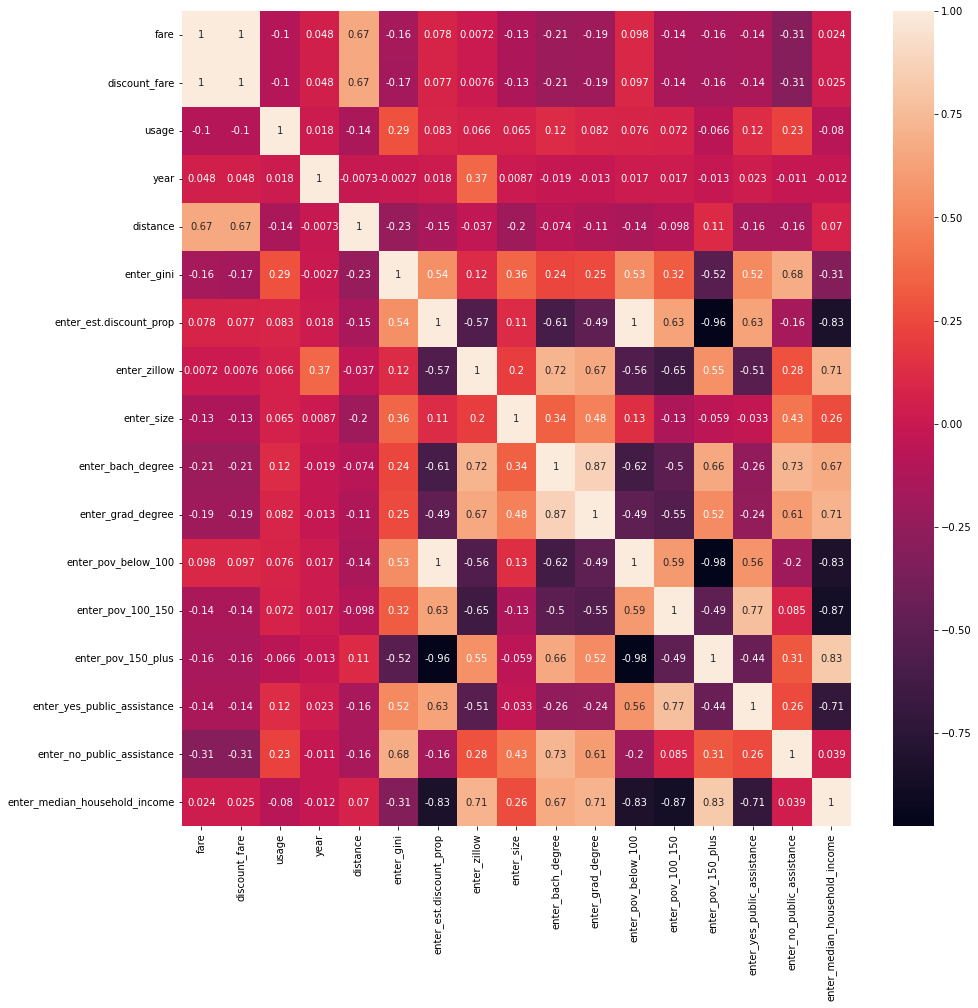

In [286]:
imp_features = [
    'fare', 'discount_fare', 'usage', 'year', 'distance', 'enter_gini',
       'enter_est.discount_prop', 'enter_zillow', 'enter_size', 'enter_bach_degree', 
       'enter_grad_degree', 'enter_pov_below_100',
       'enter_pov_100_150', 
       'enter_pov_150_plus',
       'enter_yes_public_assistance',
       'enter_no_public_assistance',
       'enter_median_household_income', 
]
plt.figure(figsize=(15, 15))
sns.heatmap(df_new[imp_features].corr(), annot=True)

<AxesSubplot:>

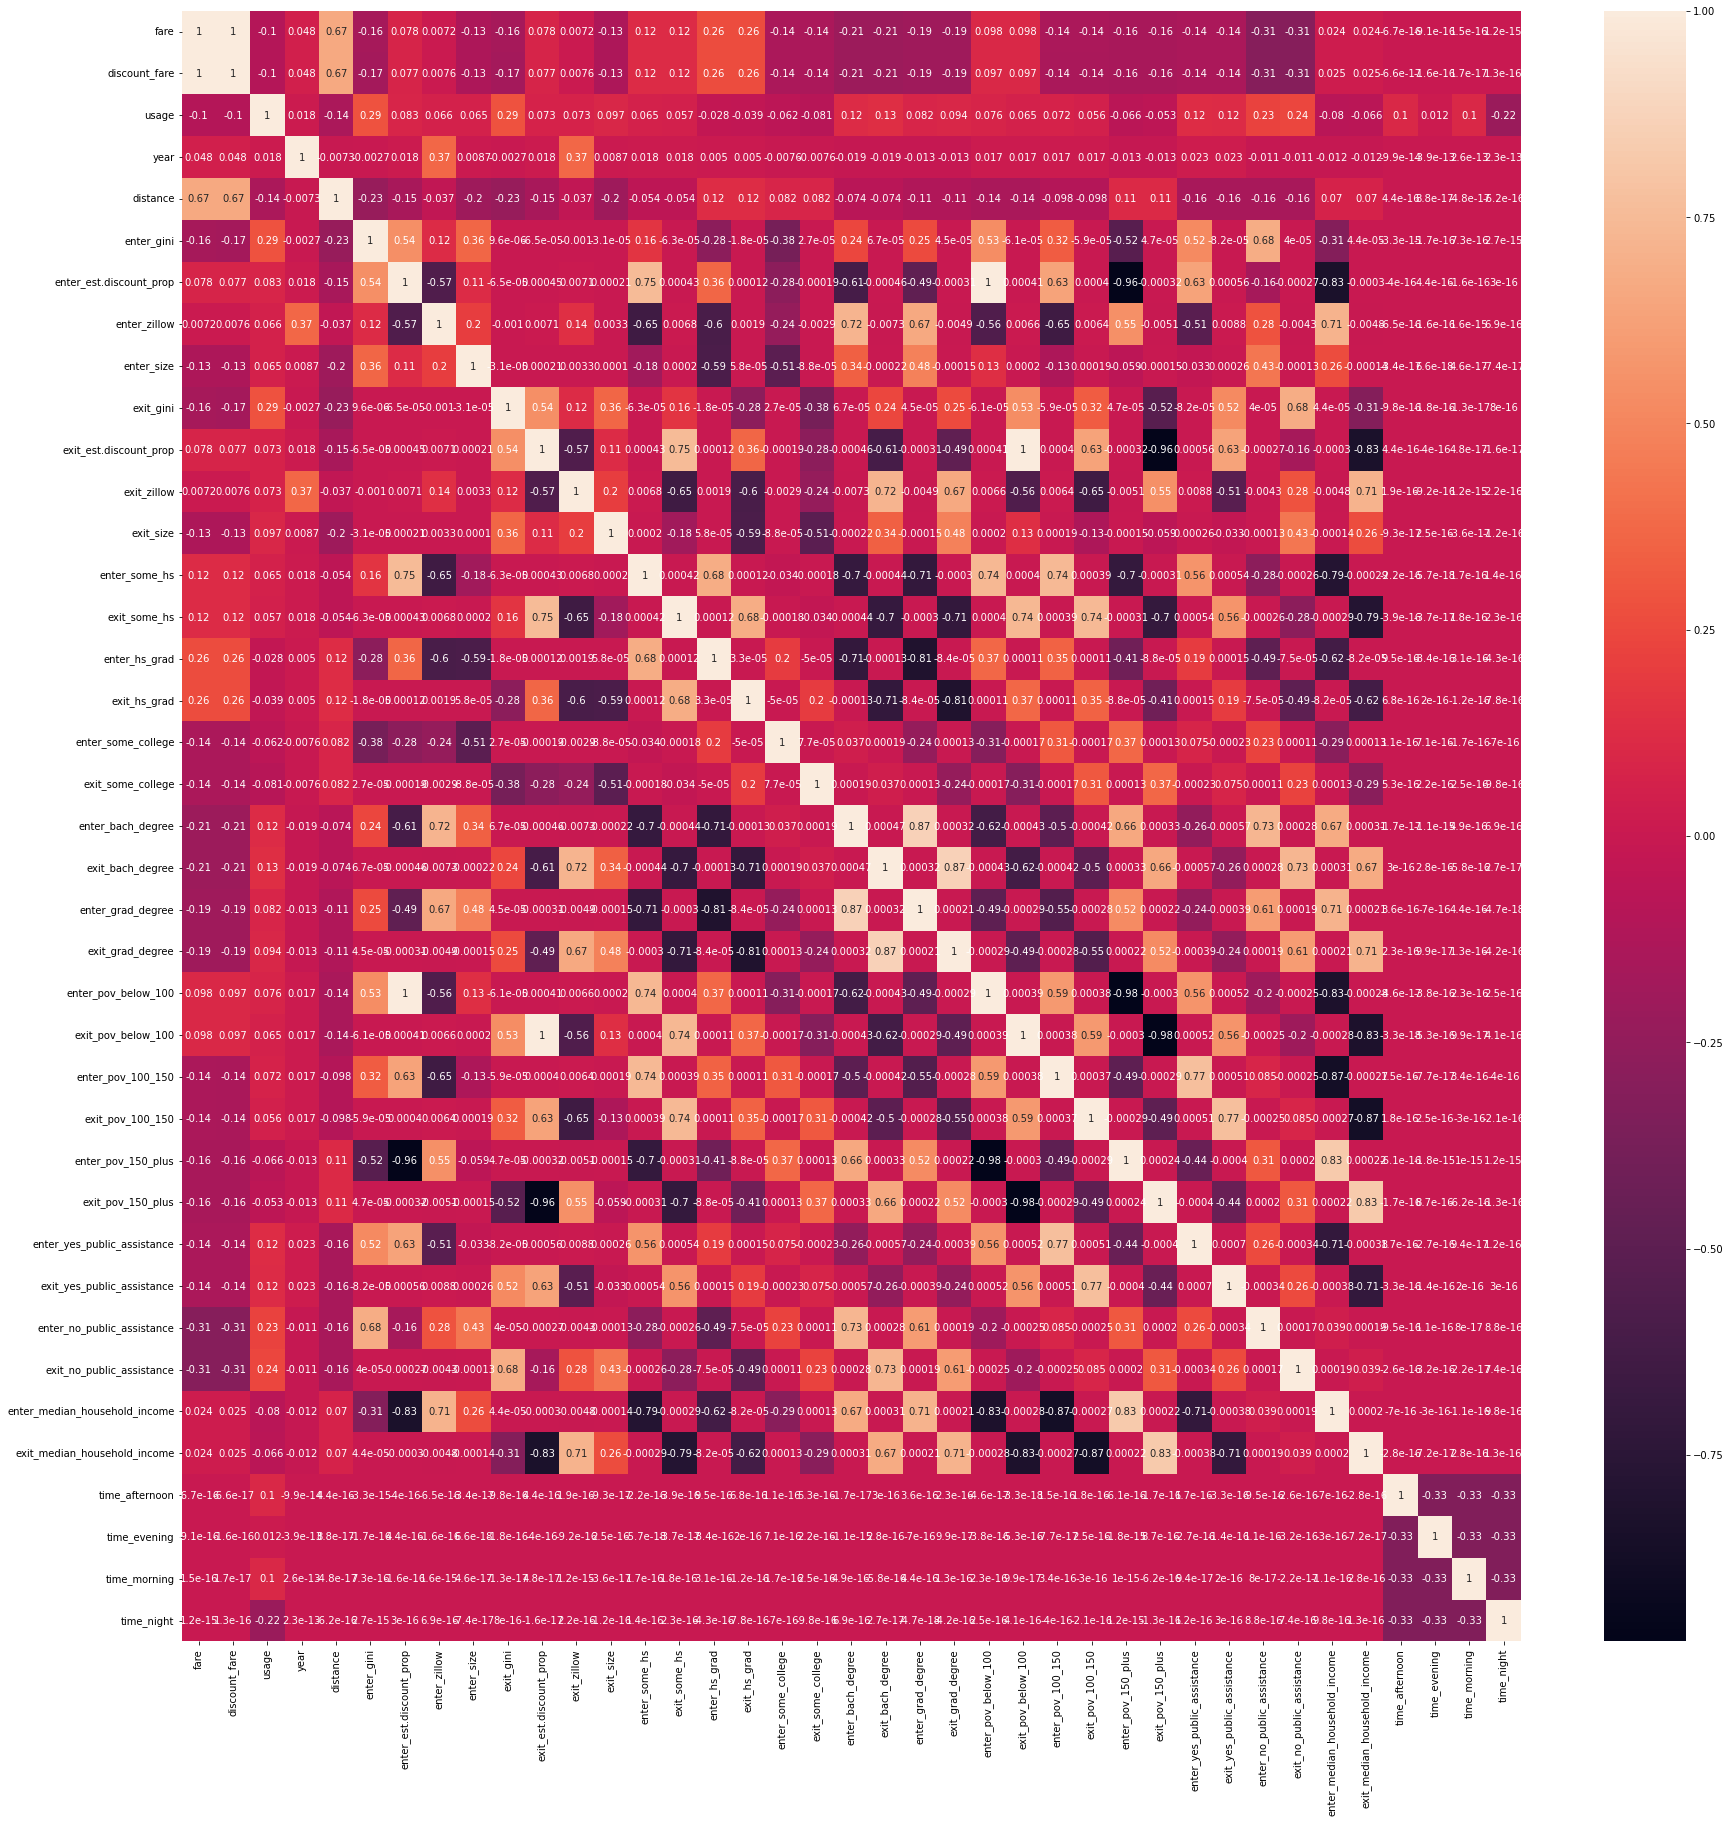

In [257]:
plt.figure(figsize=(30, 30))

sns.heatmap(df_new.corr(), annot=True)

# Predicting Fares

In [258]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_comp = pd.get_dummies(df)
scaler.fit(df_comp)
df_scaled = scaler.transform(df_comp)
df_scaled = pd.DataFrame(df_scaled, columns=df_comp.columns)
df_scaled

,fare,discount_fare,usage,year,distance,enter_gini,enter_est.discount_prop,enter_zillow,enter_size,exit_gini,...,exit_abbr_ROCK,exit_abbr_SANL,exit_abbr_SBRN,exit_abbr_SFIA,exit_abbr_SHAY,exit_abbr_SSAN,exit_abbr_UCTY,exit_abbr_WCRK,exit_abbr_WDUB,exit_abbr_WOAK
0,-0.402252,-0.371307,-0.374782,-1.430402,-0.622961,1.073148,1.353781,-1.075691,0.870152,0.501130,...,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785
1,-0.352354,-0.371307,-0.370165,-1.430402,-0.622961,1.073148,1.353781,-1.075691,0.870152,0.501130,...,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785
2,-1.225569,-1.235159,-0.385081,-1.430402,-1.394358,1.073148,1.353781,-1.075691,0.870152,0.536784,...,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785
3,-0.776487,-0.770008,-0.391658,-1.430402,-0.453747,1.073148,1.353781,-1.075691,0.870152,-0.709565,...,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785
4,-0.477099,-0.504207,-0.346405,-1.430402,-0.722905,1.073148,1.353781,-1.075691,0.870152,2.197032,...,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39427,0.296321,0.293195,-0.418860,1.392178,0.638765,-1.162219,-1.172896,0.969458,0.096828,0.008171,...,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785
39428,0.969944,0.957697,-0.419000,1.392178,0.434465,-0.766922,0.365633,-0.765751,-0.119992,-1.435051,...,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,6.588278,-0.151785
39429,-0.102863,-0.105506,-0.419027,1.392178,0.215834,-0.697163,-0.154282,-0.420934,-1.186538,0.008171,...,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785
39430,0.221474,0.226745,-0.419055,1.392178,0.482170,-1.435051,-1.189361,0.560422,-1.043541,0.008171,...,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785


In [302]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(["fare", "discount_fare", "usage"], axis=1)
y = df_scaled["fare"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [303]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [304]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

# Calculation of Mean Squared Error (MSE)
r2_score(y_test, y_pred)

0.9987132594906399

Text(0, 0.5, 'Importance Measure (Relative)')

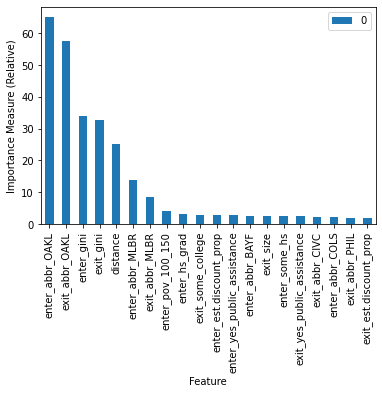

In [305]:
importance = model.get_booster().get_score(importance_type='gain')

top_features = sorted(list(importance.keys()), key=lambda x:-importance[x])[:20]

importance_df = pd.DataFrame.from_dict(data={ f : importance[f] for f in top_features}, 
                                       orient='index')  

importance_df.plot.bar()
plt.xlabel("Feature")
plt.ylabel("Importance Measure (Relative)")

# So what

* OAKL --> airport tax
* gini --> neg corr --> more economically equal --> expective
* distance: duhh


In [114]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.065 (0.003)


In [ ]:
# Predicting Usage

In [298]:
X = df_scaled.drop(["usage"], axis=1)
y = df_scaled["usage"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [299]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [300]:
y_pred = model.predict(X_test)

# Calculation of Mean Squared Error (MSE)
r2_score(y_test, y_pred)

0.9802005932645022

Text(0, 0.5, 'Importance Measure (Relative)')

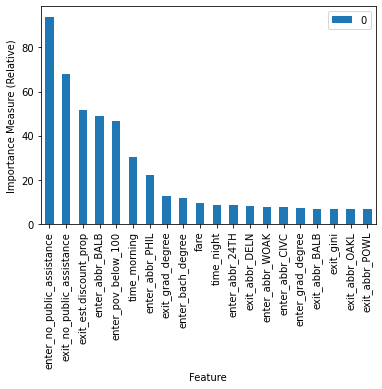

In [301]:
importance = model.get_booster().get_score(importance_type='gain')

top_features = sorted(list(importance.keys()), key=lambda x:-importance[x])[:20]

importance_df = pd.DataFrame.from_dict(data={ f : importance[f] for f in top_features}, 
                                       orient='index')  

importance_df.plot.bar()

plt.xlabel("Feature")
plt.ylabel("Importance Measure (Relative)")

In [128]:

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 3536.254 (244.883)


# So what?

Greater estimated proportion of people using discount fare, morning time, entering BALB, and gini index showed importance.

We suspect that
* public assistance: physically able to take the subwya
* discount fare: cheaper --> use more (simple econ axiom)
* pov below 100: more likely to get discounted fare
* morning time: SUSPECT that major user of BART is worker starting their day
* grad degree: SUSPECT that ppl w/ grad degree (who works at tech firm) uses subway
* Enter from BALB: People at BALB are more likely to use the subway
* gini: tech boom --> higher rent --> greater inequality --> more ppl use BART --> BART cannot handle

We saw that entering BALB (Balboa park) has a significant effect on BART Usage. 

In [ ]:
enter_from_balb = {}

for stn in stnabbr:
    enter_from_balb[stn] = trip[("BALB", stn)]

top_destinations = sorted(list(enter_from_balb.keys()), key=lambda x:-enter_from_balb[x])

for x in top_destinations[:10]:
    print(x, enter_from_balb[x])
    zipx = zipcode[x]
    for year in range(2011, 2016):
        if (zipx, year) in real_estate_dict:
            print(real_estate_dict[(zipx, year)])
        else:
            print(f"Data not available for {(zipx, year)}")

In [197]:
demographics.columns

Index(['year', 'zipcode', 'totalpop', 'some_hs', 'hs_grad', 'some_college',
       'bach_degree', 'grad_degree', 'pov_below_100', 'pov_100_150',
       'pov_150_plus', 'yes_public_assistance', 'no_public_assistance', 'gini',
       'median_household_income', 'per_capita_income'],
      dtype='object')

In [199]:
demographics_ratio = demographics.copy()
factors = ['some_hs', 'hs_grad', 'some_college',
       'bach_degree', 'grad_degree', 'pov_below_100', 'pov_100_150',
       'pov_150_plus', 'yes_public_assistance', 'no_public_assistance']

for factor in factors:
    demographics_ratio[f"{factor} ratio"] = demographics_ratio[factor]/demographics_ratio["totalpop"]

demographics_ratio.drop(factors, axis=1, inplace=True)
demographics_ratio

,year,zipcode,totalpop,gini,median_household_income,per_capita_income,some_hs ratio,hs_grad ratio,some_college ratio,bach_degree ratio,grad_degree ratio,pov_below_100 ratio,pov_100_150 ratio,pov_150_plus ratio,yes_public_assistance ratio,no_public_assistance ratio
0,2011,94014,47087,0.3822,75754.0,25707.0,0.125003,0.161701,0.195595,0.159619,0.036613,0.084503,0.077580,0.834540,0.009599,0.281139
1,2011,94030,21275,0.4289,101710.0,41515.0,0.067591,0.148625,0.226369,0.190599,0.093631,0.056968,0.048555,0.879107,0.005311,0.375793
2,2011,94066,40974,0.3791,83478.0,34007.0,0.066823,0.164251,0.228779,0.185215,0.056646,0.064553,0.051520,0.871382,0.004515,0.356812
3,2011,94080,63275,0.3939,84106.0,31645.0,0.109617,0.156950,0.211426,0.162465,0.053117,0.056057,0.079210,0.857811,0.003366,0.332311
4,2011,94102,24754,0.5845,38715.0,28747.0,0.169629,0.178961,0.196776,0.186758,0.103054,0.251313,0.179890,0.545205,0.038903,0.562374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2014,94621,32269,0.4447,31000.0,12351.0,0.232669,0.153770,0.132697,0.027488,0.008274,0.355357,0.170008,0.466578,0.042642,0.240231
144,2014,94702,16868,0.4672,98281.0,36522.0,0.055727,0.079974,0.168781,0.223737,0.203106,0.169611,0.059699,0.766303,0.011975,0.434966
145,2014,94703,21421,0.4970,95966.0,36909.0,0.042995,0.080762,0.137295,0.227300,0.213716,0.184072,0.076234,0.737921,0.021194,0.397087
146,2014,94704,26334,0.6005,55293.0,21062.0,0.008810,0.029620,0.064290,0.109706,0.097744,0.326194,0.067138,0.348257,0.004785,0.300600


In [200]:
from scipy import stats

top_zipcode = [zipcode[x] for x in top_destinations[:10]]

mean_demographics = demographics_ratio[demographics_ratio["zipcode"].isin(top_zipcode) | (demographics_ratio["zipcode"] == zipcode["BALB"])].groupby(["zipcode"]).mean()
mean_demographics

,year,totalpop,gini,median_household_income,per_capita_income,some_hs ratio,hs_grad ratio,some_college ratio,bach_degree ratio,grad_degree ratio,pov_below_100 ratio,pov_100_150 ratio,pov_150_plus ratio,yes_public_assistance ratio,no_public_assistance ratio
zipcode,,,,,,,,,,,,,,,
94014,2012.5,47826.75,0.397700,75544.00,25931.75,0.122142,0.166815,0.204231,0.159453,0.033638,0.093589,0.084282,0.819561,0.008304,0.276366
94030,2012.5,21728.00,0.428250,101221.25,42128.50,0.061977,0.141885,0.230781,0.192238,0.105132,0.056361,0.042022,0.887097,0.005038,0.365376
94066,2012.5,41523.25,0.390300,87140.50,35070.50,0.072590,0.156890,0.236796,0.183840,0.062875,0.065923,0.045919,0.879911,0.006300,0.350040
94102,2012.5,26044.75,0.601750,34680.50,30465.00,0.164556,0.152794,0.214937,0.194178,0.108290,0.269845,0.174431,0.531143,0.037324,0.552525
94104,2012.5,256.25,0.603350,45155.75,76764.50,0.167976,0.186468,0.037336,0.308790,0.153686,0.257209,0.221077,0.521714,0.010090,0.660876
94110,2012.5,71132.00,0.478000,81430.25,45381.00,0.116347,0.112750,0.144970,0.246221,0.154578,0.130384,0.074928,0.786922,0.013179,0.370092
94111,2012.5,3507.00,0.556025,129575.25,84954.00,0.121930,0.075954,0.114711,0.292451,0.264857,0.113004,0.093760,0.793236,0.004930,0.614432
94112,2012.5,81599.75,0.413300,75791.25,26276.75,0.170747,0.181017,0.181894,0.145049,0.053546,0.097111,0.109481,0.785739,0.006689,0.265414
94612,2012.5,13479.50,0.540775,34812.75,29074.75,0.173436,0.151251,0.194594,0.185811,0.107242,0.298752,0.168081,0.518060,0.023837,0.551556


In [201]:
for col in mean_demographics.columns:
    for i in mean_demographics.index:
        # convert to percentile
        mean_demographics.loc[i, col] = stats.percentileofscore(demographics_ratio.loc[:, col], mean_demographics.loc[i, col])

mean_demographics

,year,totalpop,gini,median_household_income,per_capita_income,some_hs ratio,hs_grad ratio,some_college ratio,bach_degree ratio,grad_degree ratio,pov_below_100 ratio,pov_100_150 ratio,pov_150_plus ratio,yes_public_assistance ratio,no_public_assistance ratio
zipcode,,,,,,,,,,,,,,,
94014,50.0,73.648649,12.837838,39.189189,28.378378,60.135135,72.297297,82.432432,39.864865,15.540541,43.918919,58.108108,58.108108,45.945946,16.891892
94030,50.0,30.405405,42.567568,71.621622,65.540541,36.486486,51.351351,93.918919,56.756757,52.702703,19.594595,20.270270,85.135135,24.324324,56.756757
94066,50.0,63.513514,6.756757,55.405405,52.027027,44.594595,60.810811,97.297297,52.027027,35.135135,25.000000,25.000000,81.756757,36.486486,47.297297
94102,50.0,41.891892,93.918919,8.783784,40.540541,80.405405,56.081081,87.837838,56.756757,54.729730,81.756757,95.270270,15.540541,95.270270,91.891892
94104,50.0,4.054054,93.918919,15.540541,90.540541,82.432432,93.918919,4.054054,97.972973,67.567568,80.405405,98.648649,10.135135,49.324324,99.324324
94110,50.0,89.864865,72.297297,47.972973,72.297297,55.405405,39.189189,25.675676,77.027027,68.918919,53.378378,46.621622,49.324324,60.810811,60.135135
94111,50.0,7.432432,89.189189,83.783784,94.594595,60.135135,20.270270,15.540541,95.270270,95.270270,50.675676,66.216216,51.351351,23.648649,96.621622
94112,50.0,95.945946,28.378378,39.864865,31.081081,83.783784,89.864865,54.729730,30.405405,30.405405,46.621622,77.027027,47.972973,39.189189,7.432432
94612,50.0,9.459459,86.486486,9.459459,34.459459,84.459459,55.405405,68.243243,53.378378,54.054054,89.189189,91.891892,10.135135,84.459459,91.216216


In [193]:
zipcode["BALB"]

94112

In [292]:
print("Demographic Percentile for Balboa Park Station")

mean_demographics.loc[94112, :]

Demographic Percentile for Balboa Park Station


year                           50.000000
totalpop                       95.945946
gini                           28.378378
median_household_income        39.864865
per_capita_income              31.081081
some_hs ratio                  83.783784
hs_grad ratio                  89.864865
some_college ratio             54.729730
bach_degree ratio              30.405405
grad_degree ratio              30.405405
pov_below_100 ratio            46.621622
pov_100_150 ratio              77.027027
pov_150_plus ratio             47.972973
yes_public_assistance ratio    39.189189
no_public_assistance ratio      7.432432
Name: 94112, dtype: float64